In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# 1. Import the train datasets

In [2]:
X_train = pd.read_csv("A_Normalised_train_data.csv",index_col=0)
Y_train = pd.read_csv("A_Log_sales_train.csv",index_col=0)

In [3]:
Model_1 = RandomForestRegressor()

# 2. Setup Pipeline

In [4]:
pca=PCA()
RG = Model_1

In [5]:
# Step 1: PCA
# Step 2: Model
pipe = Pipeline(steps=[("pca",pca),("RG",RG)])

In [6]:
param_grid = {
    "pca__n_components": [5, 45, 100,170],
    "RG__ccp_alpha":[0.005,0.1,0.5,10],
    "RG__n_estimators":[10,100,1000]
    
}

# 3. Setup GridSearch

In [7]:
score_metric = 'neg_mean_squared_error'
search = GridSearchCV(pipe,param_grid,
                      n_jobs=-1,
                      cv=10,
                      scoring=score_metric)

In [8]:
search.fit(X_train,Y_train)

C:\Users\Wayne Linn\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('RG', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'RG__ccp_alpha': [0.005, 0.1, 0.5, 10],
                         'RG__n_estimators': [10, 100, 1000],
                         'pca__n_components': [5, 45, 100, 170]},
             scoring='neg_mean_squared_error')

In [9]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-0.638):
{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1000, 'pca__n_components': 170}


In [10]:
df = pd.DataFrame(search.cv_results_)
df = df.sort_values(by=['rank_test_score'])
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_RG__ccp_alpha,param_RG__n_estimators,param_pca__n_components,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
11,254.598267,6.589156,0.153095,0.030688,0.005,1000,170,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1...",-0.583825,-0.561059,...,-0.734838,-0.822347,-0.545241,-0.609459,-0.626476,-0.698931,-0.582947,-0.637587,0.083218,1
7,25.355378,0.843521,0.021543,0.004166,0.005,100,170,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1...",-0.590700,-0.583152,...,-0.754636,-0.833858,-0.558060,-0.604523,-0.637302,-0.704378,-0.593010,-0.648701,0.083737,2
3,2.810741,0.396924,0.011968,0.004987,0.005,10,170,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1...",-0.615568,-0.625292,...,-0.762785,-0.859770,-0.634924,-0.624221,-0.652283,-0.715270,-0.613610,-0.675432,0.076507,3
5,9.024322,0.199925,0.020545,0.003432,0.005,100,45,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1...",-0.715588,-0.722313,...,-0.898060,-0.950637,-0.693785,-0.709395,-0.767483,-0.811129,-0.731454,-0.782324,0.082621,4
9,94.639578,1.513121,0.143501,0.016551,0.005,1000,45,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1...",-0.709338,-0.695956,...,-0.880675,-0.978086,-0.736826,-0.732524,-0.760602,-0.774423,-0.769420,-0.784639,0.081650,5
10,191.624908,3.240455,0.146337,0.019728,0.005,1000,100,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1...",-0.732937,-0.700541,...,-0.910526,-0.976382,-0.718419,-0.728603,-0.767049,-0.791160,-0.757261,-0.788306,0.084316,6
6,18.614999,0.563636,0.023220,0.004911,0.005,100,100,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1...",-0.732877,-0.707769,...,-0.927752,-0.967094,-0.725333,-0.725499,-0.776844,-0.813668,-0.731533,-0.790543,0.085383,7
1,1.107722,0.206869,0.009176,0.002082,0.005,10,45,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1...",-0.777004,-0.776974,...,-0.936143,-1.040875,-0.750273,-0.733444,-0.805425,-0.793464,-0.769784,-0.826062,0.092019,8
2,2.350405,0.412157,0.009275,0.001342,0.005,10,100,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1...",-0.765811,-0.759747,...,-0.941176,-1.012127,-0.750827,-0.811237,-0.821169,-0.853152,-0.737413,-0.828431,0.083887,9
4,2.397402,0.422730,0.020944,0.001839,0.005,100,5,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1...",-0.787904,-0.771248,...,-0.986682,-1.097129,-0.786387,-0.776043,-0.784017,-0.878677,-0.829801,-0.860356,0.103411,10


# 4. Best Hyperparameter

In [11]:
parms = pd.DataFrame(df['params'])
for i in parms.iloc[0]:
    print(i)

{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1000, 'pca__n_components': 170}


# 5. Evaluate Model $log(Sales)$

In [12]:
best_pca =parms.iloc[0][0]['pca__n_components']
best_ccp_alpha = parms.iloc[0][0]['RG__ccp_alpha']
best_n_est = parms.iloc[0][0]['RG__n_estimators']

In [13]:
Model_2 = RandomForestRegressor(ccp_alpha=best_ccp_alpha,n_estimators=best_n_est)

In [14]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_train,Y_train,test_size=0.2,random_state=132)


In [15]:
pca1 = PCA(n_components=best_pca)
pca1.fit(X_train1)
PX_train1 = pca1.transform(X_train1)
RG1 = Model_2
RG1.fit(PX_train1,Y_train1)

<ipython-input-15-fbb0627d7471>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RG1.fit(PX_train1,Y_train1)


RandomForestRegressor(ccp_alpha=0.005, n_estimators=1000)

In [16]:
pca2 = PCA(n_components=best_pca)
pca2.fit(X_test1)
PX_test1 = pca2.transform(X_test1)

In [17]:
MSE(RG1.predict(PX_test1),Y_test1)

1.4939232611484086

In [18]:
result = pd.DataFrame(np.exp(Y_test1))

In [19]:
result["Predicted_sales"] = np.exp(RG1.predict(PX_test1))

In [20]:
MSE(result["sales"],result["Predicted_sales"])

939.4580299962582

# 5.1 Model using original sales data

In [21]:
Model_3 = RandomForestRegressor(ccp_alpha=best_ccp_alpha,n_estimators=best_n_est)

In [22]:
OY_train = pd.read_csv("A_sales_train.csv",index_col=0)

In [23]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X_train,OY_train,test_size=0.2,random_state=132)

In [24]:
pca3 = PCA(n_components=best_pca)
pca3.fit(X_train2)
PX_train2 = pca3.transform(X_train2)
RG2 = Model_3
RG2.fit(PX_train2,Y_train2)

<ipython-input-24-92233a376675>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RG2.fit(PX_train2,Y_train2)


RandomForestRegressor(ccp_alpha=0.005, n_estimators=1000)

In [25]:
pca4 = PCA(n_components=best_pca)
pca4.fit(X_test2)
PX_test2 = pca4.transform(X_test2)

In [26]:
MSE(RG2.predict(PX_test2),Y_test2)

2850.73046789694

#### Notably model trained on log(Sales) has lower out-of-sample MSE than model with unmodified Sales

# 6. Inventory Decision

In [27]:
residual = result['sales']-result['Predicted_sales']

In [28]:
Price=20
Cost=12
Salvage=8
Over=Cost - Salvage
Under=Price - Cost
Over, Under

(4, 8)

### QQ plot to explore the distribution of residual

#### Normal Distribution

In [29]:
import scipy.stats as sct

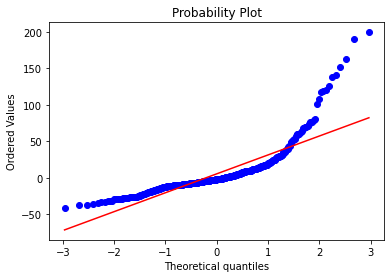

In [30]:
import scipy
scipy.stats.probplot(residual, dist="norm", plot=plt)
plt.show()

In [31]:
s = residual.std()
opt_dec_N=np.ceil(sct.norm.ppf(Under/(Under+Over))*s + result['Predicted_sales'])

#### Exponential Distribution

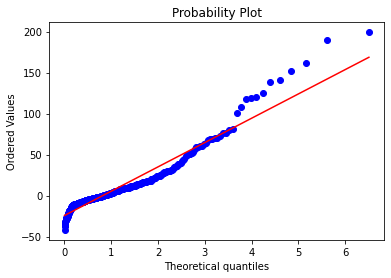

In [32]:
scipy.stats.probplot(residual, dist="expon", plot=plt)
plt.show()

In [33]:
opt_dec_E=np.ceil((-result['Predicted_sales'])*np.log(1-(Under/(Under+Over))))

#### Empirical Distribution

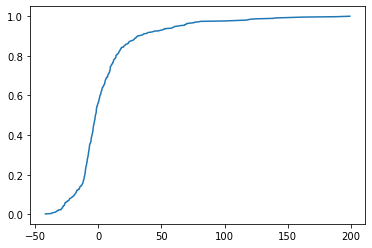

In [34]:
size = residual.shape[0]
step=1/size
jumps = [step*i for i in range(1,size+1)]
Sample = sorted(residual)
plt.plot(Sample,jumps)

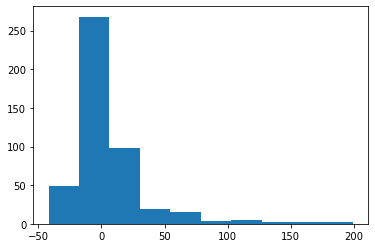

In [35]:
plt.hist(Sample)
plt.show()

In [36]:
def inv(sample,jump,area):
    size = len(sample)
    temp=0
    i=0
    while temp<area:
        temp=jump[i]
        i+=1
    return sample[i]

In [37]:
offset = inv(Sample,jumps,2/3)
offset

5.315410757147276

In [38]:
opt_dec_B = np.ceil(result['Predicted_sales']+offset)

# 7. Out-of-samples Profit

In [39]:
#max profit for test data set
max_profit = result['sales'].sum()*(Price-Cost)
max_profit

82096.0

In [40]:
def profit(demand,inv):
    return (Price-Salvage)*np.minimum(demand,inv)-(Cost-Salvage)*inv

In [41]:
#Profit (Normal)
profit_lst_N = profit(result['sales'],opt_dec_N)
profit_lst_N.sum()

27124.0

In [42]:
#Profit (Exponential)
profit_lst_E = profit(result['sales'],opt_dec_E)
profit_lst_E.sum()

29168.0

In [43]:
#Profit (Empirical)
profit_lst_B = profit(result['sales'],opt_dec_B)
profit_lst_B.sum()

29988.0

# 8. K-Fold Cross Validation

### Repeat steps 5,6,7 with 10-fold cross validation

In [44]:
Model_4= RandomForestRegressor(ccp_alpha=best_ccp_alpha,n_estimators=best_n_est)

In [45]:
from sklearn.model_selection import KFold
k=10
kf = KFold(n_splits=k)
X_train_t=X_train.to_numpy()
Y_train_t=Y_train.to_numpy()
model = []
mse_lst = []
max_profit_lst = []
profit_N_lst = []
profit_E_lst = []
profit_B_lst = []

for train_index,test_index in kf.split(X_train_t):
    X_train_K,X_test_K=X_train_t[train_index],X_train_t[test_index]
    Y_train_K,Y_test_K=Y_train_t[train_index],Y_train_t[test_index]
    
    #PCA to transform train data
    pca_K1 = PCA(n_components=best_pca)
    pca_K1.fit(X_train_K)
    PX_train_K = pca_K1.transform(X_train_K)
    
    #Model
    RG_K = Model_4
    RG_K.fit(PX_train_K,Y_train_K)
    
    #pca to transform test data
    pca_K2 = PCA(n_components=best_pca)
    pca_K2.fit(X_test_K)
    PX_test_K = pca_K2.transform(X_test_K)
    
    #MSE
    mse_lst.append(MSE(RG_K.predict(PX_test_K),Y_test_K))
    
    #Transform log(sale) back to sale
    result_K = pd.DataFrame(np.exp(Y_test_K))
    result_K["Predicted_sales"] = np.exp(RG_K.predict(PX_test_K))
    
    #Obtain residual
    residual_K = result_K[0]-result_K['Predicted_sales']
    
    #Get std for Normal distribution
    s_K = residual.std()
    
    #Inventory Decision (Normal)
    opt_dec_N_K=np.ceil(sct.norm.ppf(Under/(Under+Over))*s_K + result_K['Predicted_sales'])
    #Inventory Decision (Exponential)
    opt_dec_E_K=np.ceil((-result_K['Predicted_sales'])*np.log(1-(Under/(Under+Over))))
    
    #Inventory Decision (Empirical Distribution)
    size_K = residual_K.shape[0]
    step_K=1/size_K
    jumps_K = [step_K*i for i in range(1,size+1)]
    Sample_K = sorted(residual_K)
    offset_K = inv(Sample_K,jumps_K,2/3)
    opt_dec_B_K = np.ceil(result_K['Predicted_sales']+offset_K)
    
    #Out-of_sample profit
    profit_lst_B_K = profit(result_K[0],opt_dec_B_K)
    profit_B_lst.append(profit_lst_B_K.sum())
    
    profit_lst_N_K = profit(result_K[0],opt_dec_N_K)
    profit_N_lst.append(profit_lst_N_K.sum())
    
    profit_lst_E_K = profit(result_K[0],opt_dec_E_K)
    profit_E_lst.append(profit_lst_E_K.sum())
    
    max_profit_K = result_K[0].sum()*(Price-Cost)
    max_profit_lst.append(max_profit_K)
    
max_profit_lst = np.array(max_profit_lst)
profit_N_lst = np.array(profit_N_lst)
profit_E_lst = np.array(profit_E_lst)
profit_B_lst = np.array(profit_B_lst)

fraction_of_max_N = profit_N_lst/max_profit_lst
fraction_of_max_E = profit_E_lst/max_profit_lst
fraction_of_max_B = profit_B_lst/max_profit_lst

dist_profit = ["Normal","Exponential","Empirical","Max"]
dist_frac = ["Normal","Exponential","Empirical"]
col_name = ["Dataset_"+str(i) for i in range(1,k+1)]

profit_lst = [profit_N_lst,profit_E_lst,profit_B_lst,max_profit_lst]
profit_table = pd.DataFrame(profit_lst,index=dist_profit,columns=col_name)
profit_table["mean_profit"]=profit_table.mean(axis=1)
profit_table["std_profit"]=profit_table.std(ddof=1,axis=1)

fraction_lst = [fraction_of_max_N,fraction_of_max_E,fraction_of_max_B]
fraction_table = pd.DataFrame(fraction_lst,index=dist_frac,columns=col_name)
fraction_table["mean_fraction"]=fraction_table.mean(axis=1)

<ipython-input-45-6beedb99001d>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RG_K.fit(PX_train_K,Y_train_K)
<ipython-input-45-6beedb99001d>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RG_K.fit(PX_train_K,Y_train_K)
<ipython-input-45-6beedb99001d>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RG_K.fit(PX_train_K,Y_train_K)
<ipython-input-45-6beedb99001d>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RG_K.fit(PX_train_K,Y_train_K)
<ipython-input-45-6beedb99001d>:24: DataConversionWarning: A column-vector y was passed when a 1d array 

In [46]:
fraction_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_fraction
Normal,0.295283,0.377409,0.313202,0.270215,0.256728,0.369801,0.195638,0.350043,0.329456,0.285920,0.304370
Exponential,0.331626,0.371310,0.283307,0.290901,0.273650,0.375743,0.217612,0.328014,0.350662,0.332597,0.315542
Empirical,0.337328,0.391285,0.318472,0.295708,0.282595,0.394796,0.230355,0.358369,0.359431,0.337399,0.330574


In [47]:
profit_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_profit,std_profit
Normal,12220.0,17080.0,14500.0,12592.0,12744.0,14440.0,9580.0,16144.0,14728.0,11908.0,13593.6,2098.722812
Exponential,13724.0,16804.0,13116.0,13556.0,13584.0,14672.0,10656.0,15128.0,15676.0,13852.0,14076.8,1573.799276
Empirical,13960.0,17708.0,14744.0,13780.0,14028.0,15416.0,11280.0,16528.0,16068.0,14052.0,14756.4,1694.276908
Max,41384.0,45256.0,46296.0,46600.0,49640.0,39048.0,48968.0,46120.0,44704.0,41648.0,44966.4,3203.875254


In [48]:
profit_table.to_csv(".\\Model_Selection_Result\\4.2_Random_forest.csv")